In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


/Users/pkim/Dropbox/Projects/SpringAccel


In [2]:
# Imports
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
am_i_local = "yes"
if am_i_local == "yes":
    try:
        os.chdir(os.path.join(os.getcwd(), '../SpringAccel'))
        print(os.getcwd())
    except:
        pass
from IPython.display import display

pd.options.display.max_columns = None

csv_input = 'files/july19/SF_1a.csv'
csv_output = 'files/july19/SF_1b.csv'

/Users/pkim/Dropbox/Projects/SpringAccel


In [3]:
#Read in dataset 
# Readin file from 1a 
df = pd.read_csv(csv_input,index_col = "Unnamed: 0")
df.describe()



,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
count,3.168000e+03,3.168000e+03,0.0,0.0,0.0,3.168000e+03,0.0,3168.000000,3168.000000,0.0,2930.000000,3168.000000,3168.000000,3168.000000,3162.000000,3166.000000,3167.000000,73.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,3168.000000,3168.000000,3168.000000,3168.000000,2878.000000,3168.000000
mean,1.635304e+07,2.019071e+13,NaN,NaN,NaN,3.829629e+07,NaN,108.670455,108.670455,NaN,94114.814334,37.763275,-122.432231,3.214962,1.273719,1.349653,1.726555,917.630137,1.806818,11.011995,450.539141,10.799242,11.284722,449.008523,450.542298,10.966351,450.520612,6.068497,16.438763,29.443813,142.431187,70.360480,23.334912,97.485059,9.933287,9.861015,9.939889,9.946491,9.782140,9.585129,23.143308,21.330177,1.776831,0.036301,2.398433,0.079861
std,1.089399e+07,0.000000e+00,NaN,NaN,NaN,5.412354e+07,NaN,347.763809,347.763809,NaN,9.597979,0.021747,0.027296,1.964527,0.549897,0.910867,1.145068,759.179812,1.424200,17.507827,1843.786701,17.443891,17.706383,1843.715289,1843.785972,17.439191,1843.782228,8.116653,16.963920,26.712931,124.826562,92.263222,26.189478,3.495011,0.323557,0.412022,0.399252,0.347672,0.511393,0.602002,66.284836,66.636539,4.485574,0.448421,2.168623,0.271121
min,9.580000e+02,2.019071e+13,NaN,NaN,NaN,4.600000e+01,NaN,0.000000,0.000000,NaN,94014.000000,37.707930,-122.510150,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.066042e+06,2.019071e+13,NaN,NaN,NaN,3.283452e+06,NaN,1.000000,1.000000,NaN,94110.000000,37.748595,-122.443992,2.000000,1.000000,1.000000,1.000000,300.000000,1.000000,2.000000,26.000000,2.000000,2.000000,26.000000,26.000000,2.000000,26.000000,0.000000,1.000000,5.000000,22.000000,8.000000,2.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.650000,0.000000
50%,1.691204e+07,2.019071e+13,NaN,NaN,NaN,1.344487e+07,NaN,2.000000,2.000000,NaN,94114.000000,37.762435,-122.428150,2.000000,1.000000,1.000000,1.000000,750.000000,1.000000,3.000000,60.000000,3.000000,3.000000,60.000000,60.000000,3.000000,60.000000,3.000000,11.000000,23.000000,111.000000,34.000000,14.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.765000,0.000000
75%,2.578936e+07,2.019071e+13,NaN,NaN,NaN,4.800549e+07,NaN,5.000000,5.000000,NaN,94121.000000,37.779313,-122.411583,4.000000,1.500000,2.000000,2.000000,1200.000000,2.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,9.000000,26.000000,50.000000,264.250000,98.000000,37.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,2.000000,2.000000,0.000000,3.620000,0.000000
max,3.644775

In [4]:
len(df.columns)

108

In [5]:
# Drop weird column 
df.head()



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,url,isPlus
0,958,https://www.airbnb.com/rooms/958,20190708031549,2019-07-08,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within an hour,92%,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Lower Haight,Western Addition,NaN,San Francisco,CA,94117.0,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,3 months ago,t,2,3,4,92,2019-07-08,194,47,2009-07-23,2019-05-31,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1,0,0,1.60,NaN,0
1,3850,https://www.airbnb.com/rooms/3850,20190708031549,2019-07-08,Charming room for two,Your own private room plus access to a shared ...,"This is the first room I rented on Airbnb, sta...",Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",Here is the complete list of House Rules you a...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",These House Rules have money associated with t...,NaN,NaN,https://a0.muscache.com/im/pictures/b6e97d2a-1...,NaN,4921,https://www.airbnb.com/users/show/4921,Kevin,2008-12-08,"San Francisco, California, United States",I am a retired software entre

In [6]:
df['isPlus'] = df['isPlus'].apply(lambda x: 1 if x == 1 else 0)

df.columns



Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'url', 'isPlus'],
      dtype='object', length=108)

In [7]:
sum(df['isPlus'].dropna())

253

In [8]:
# creates new popluation where it's either Plus listings or Superhost listings
population = df[(df['isPlus'] == 1) | (df['host_is_superhost'] == 't')]
population.describe()


,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
count,3.168000e+03,3.168000e+03,0.0,0.0,0.0,3.168000e+03,0.0,3168.000000,3168.000000,0.0,2930.000000,3168.000000,3168.000000,3168.000000,3162.000000,3166.000000,3167.000000,73.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,3168.000000,3168.000000,3168.000000,3168.000000,2878.000000,3168.000000
mean,1.635304e+07,2.019071e+13,NaN,NaN,NaN,3.829629e+07,NaN,108.670455,108.670455,NaN,94114.814334,37.763275,-122.432231,3.214962,1.273719,1.349653,1.726555,917.630137,1.806818,11.011995,450.539141,10.799242,11.284722,449.008523,450.542298,10.966351,450.520612,6.068497,16.438763,29.443813,142.431187,70.360480,23.334912,97.485059,9.933287,9.861015,9.939889,9.946491,9.782140,9.585129,23.143308,21.330177,1.776831,0.036301,2.398433,0.079861
std,1.089399e+07,0.000000e+00,NaN,NaN,NaN,5.412354e+07,NaN,347.763809,347.763809,NaN,9.597979,0.021747,0.027296,1.964527,0.549897,0.910867,1.145068,759.179812,1.424200,17.507827,1843.786701,17.443891,17.706383,1843.715289,1843.785972,17.439191,1843.782228,8.116653,16.963920,26.712931,124.826562,92.263222,26.189478,3.495011,0.323557,0.412022,0.399252,0.347672,0.511393,0.602002,66.284836,66.636539,4.485574,0.448421,2.168623,0.271121
min,9.580000e+02,2.019071e+13,NaN,NaN,NaN,4.600000e+01,NaN,0.000000,0.000000,NaN,94014.000000,37.707930,-122.510150,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.066042e+06,2.019071e+13,NaN,NaN,NaN,3.283452e+06,NaN,1.000000,1.000000,NaN,94110.000000,37.748595,-122.443992,2.000000,1.000000,1.000000,1.000000,300.000000,1.000000,2.000000,26.000000,2.000000,2.000000,26.000000,26.000000,2.000000,26.000000,0.000000,1.000000,5.000000,22.000000,8.000000,2.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.650000,0.000000
50%,1.691204e+07,2.019071e+13,NaN,NaN,NaN,1.344487e+07,NaN,2.000000,2.000000,NaN,94114.000000,37.762435,-122.428150,2.000000,1.000000,1.000000,1.000000,750.000000,1.000000,3.000000,60.000000,3.000000,3.000000,60.000000,60.000000,3.000000,60.000000,3.000000,11.000000,23.000000,111.000000,34.000000,14.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.765000,0.000000
75%,2.578936e+07,2.019071e+13,NaN,NaN,NaN,4.800549e+07,NaN,5.000000,5.000000,NaN,94121.000000,37.779313,-122.411583,4.000000,1.500000,2.000000,2.000000,1200.000000,2.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,9.000000,26.000000,50.000000,264.250000,98.000000,37.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,2.000000,2.000000,0.000000,3.620000,0.000000
max,3.644775

In [9]:
population.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,url,isPlus
0,958,https://www.airbnb.com/rooms/958,20190708031549,2019-07-08,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within an hour,92%,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Lower Haight,Western Addition,NaN,San Francisco,CA,94117.0,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,3 months ago,t,2,3,4,92,2019-07-08,194,47,2009-07-23,2019-05-31,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1,0,0,1.6,NaN,0


In [10]:
cols_to_drop = ['listing_url','scrape_id','last_scraped','experiences_offered','thumbnail_url','medium_url',
                'picture_url','xl_picture_url','host_url','host_name','host_location','host_about',
                'host_thumbnail_url', 'host_picture_url','host_neighbourhood','street','neighbourhood',
                'neighbourhood_group_cleansed','city','state','market','smart_location','country_code',
                'country_code','calendar_last_scraped','jurisdiction_names'
               ]

In [11]:
population.drop(cols_to_drop, axis=1).head(1)

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,url,isPlus
0,958,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,2008-07-31,within an hour,92%,NaN,t,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Western Addition,94117.0,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,3 months ago,t,2,3,4,92,194,47,2009-07-23,2019-05-31,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,t,f,moderate,f,f,1,1,0,0,1.6,NaN,0


In [12]:
# Missing cols removal 
num_rows = len(population)
for col_name in population.columns:
    na_tot = sum(population[col_name].isna())
    if na_tot/num_rows > 0.5:
        print(col_name, ": ", str(na_tot/num_rows))
        population.drop(col_name,axis=1,inplace=True)

thumbnail_url :  1.0
medium_url :  1.0
xl_picture_url :  1.0
host_acceptance_rate :  1.0
neighbourhood_group_cleansed :  1.0
square_feet :  0.9769570707070707
weekly_price :  0.8368055555555556
monthly_price :  0.8456439393939394
url :  0.9201388888888888


In [13]:
population.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,958,https://www.airbnb.com/rooms/958,20190708031549,2019-07-08,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,https://a0.muscache.com/im/pictures/b7c2a199-4...,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within an hour,92%,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Lower Haight,Western Addition,San Francisco,CA,94117.0,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,3 months ago,t,2,3,4,92,2019-07-08,194,47,2009-07-23,2019-05-31,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1,0,0,1.6,0


In [14]:
col_no_url_scrape = [col for col in population.columns if "url" not in col and 'scrape' not in col]
population = population[col_no_url_scrape]

In [15]:
population.head(1)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,958,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within an hour,92%,t,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Lower Haight,Western Addition,San Francisco,CA,94117.0,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,3 months ago,t,2,3,4,92,194,47,2009-07-23,2019-05-31,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1,0,0,1.6,0


In [16]:
text_cols = ['name','summary','space','description',
             'neighborhood_overview','notes','transit',
             'access','interaction','house_rules','host_about'
            ]
id_cols = ['id','host_id','host_name']
nlp_dataset = population[text_cols + id_cols]

In [17]:
nlp_dataset.head(1)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,id,host_id,host_name
0,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,We are a family with 2 boys born in 2009 and 2...,958,1169,Holly


In [18]:
nlp_dataset.to_csv('files/july19/SF_nlp_ds.csv',index=False)

In [19]:
population.drop(text_cols+['host_name'], axis=1 ,inplace = True)

In [20]:
population.head(1)

,id,experiences_offered,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,958,none,1169,2008-07-31,"San Francisco, California, United States",within an hour,92%,t,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Lower Haight,Western Addition,San Francisco,CA,94117.0,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,3 months ago,t,2,3,4,92,194,47,2009-07-23,2019-05-31,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1,0,0,1.6,0


In [21]:
# only latitude and longitude will stay cause they can be scaled
# The other location columns need to be removed if model wants to be used for 
# other markets
location_cols = ['host_location','host_neighbourhood' ,'street','neighbourhood',
                'neighbourhood_cleansed','city','state','zipcode','market','smart_location',
                'country_code','country','jurisdiction_names']
time_cols = ['host_since','first_review','last_review']

population.drop(location_cols+time_cols, axis=1,inplace = True)


In [22]:
population.head(1)

,id,experiences_offered,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,958,none,1169,within an hour,92%,t,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,3 months ago,t,2,3,4,92,194,47,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,t,f,moderate,f,f,1,1,0,0,1.6,0


In [23]:
constant_cols = []
for cols in population.columns:
    if len(population[cols].unique()) == 1:
        print(cols)
        constant_cols.append(cols)
population.drop(constant_cols, axis=1, inplace=True)

experiences_offered
has_availability
is_business_travel_ready


In [24]:
population.head(1)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,958,1169,within an hour,92%,t,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,3 months ago,2,3,4,92,194,47,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,t,moderate,f,f,1,1,0,0,1.6,0


In [25]:
for cols in population.columns:
    if len(population[cols].unique()) == 2:
        print(cols, population[cols].unique())
        if 't' in population[cols].unique():
            population[cols] = population[cols].apply(lambda x: 1 if x =='t' else 0)[1]



host_is_superhost ['t' 'f']
host_has_profile_pic ['t' 'f']
host_identity_verified ['t' 'f']
is_location_exact ['t' 'f']
requires_license ['t' 'f']
instant_bookable ['t' 'f']
require_guest_profile_picture ['f' 't']
require_guest_phone_verification ['f' 't']
isPlus [0 1]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [26]:
population.head(1)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,958,1169,within an hour,92%,1,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,37.76931,-122.43386,1,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,3 months ago,2,3,4,92,194,47,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1,STR-0001256,0,moderate,0,0,1,1,0,0,1.6,0


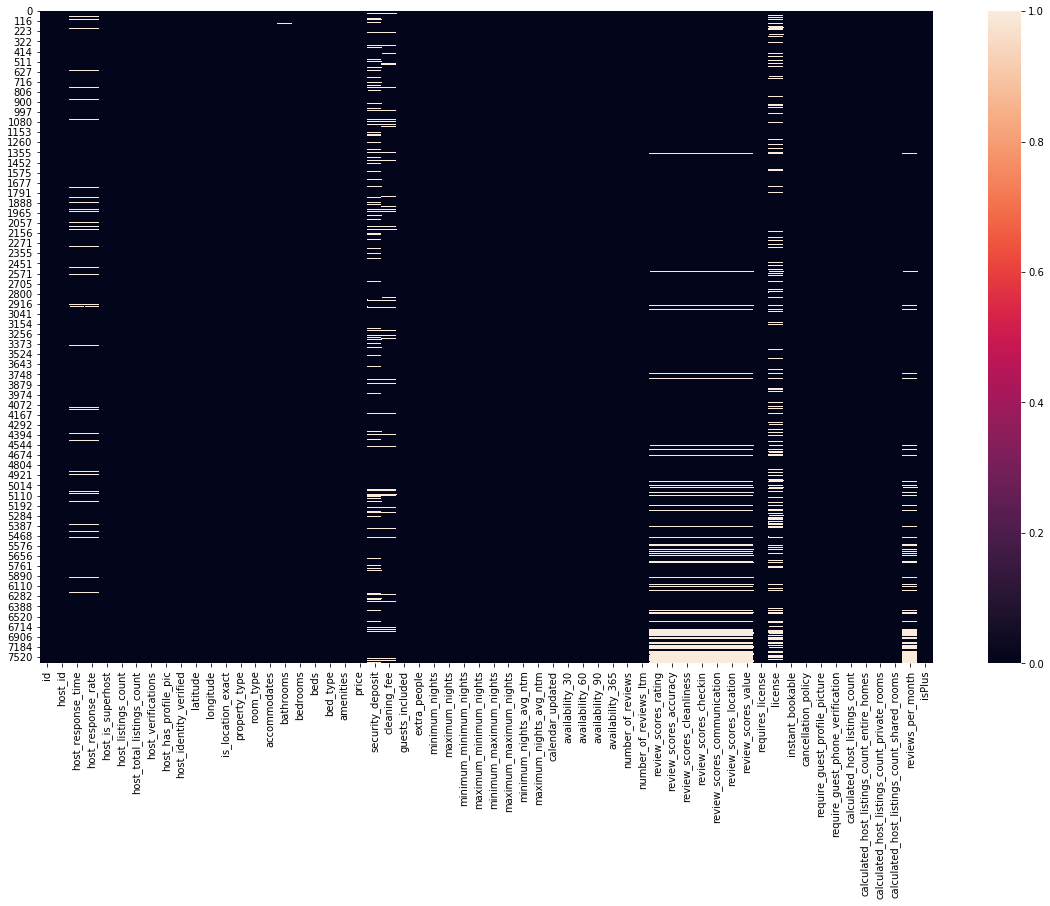

In [27]:
plt.figure(figsize=(20,12))
sns.heatmap(population.isna())



In [28]:
population['beds'].dropna().unique()

array([ 2.,  1.,  3.,  5.,  4.,  0.,  7.,  6.,  8., 12.,  9.])

In [29]:
population['beds'] = pd.to_numeric(population['beds'])

(array([1.775e+03, 8.420e+02, 3.150e+02, 1.380e+02, 5.300e+01, 3.500e+01,
        5.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

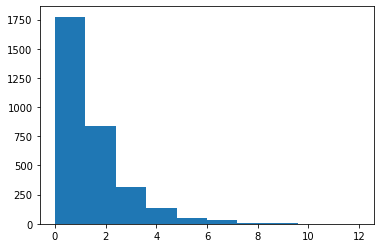

In [30]:
plt.hist(population['beds'].dropna())

In [31]:
population['beds'].loc[population['beds'].isna()]

6777   NaN
Name: beds, dtype: float64

In [32]:
population.head(1)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,958,1169,within an hour,92%,1,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,37.76931,-122.43386,1,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,3 months ago,2,3,4,92,194,47,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1,STR-0001256,0,moderate,0,0,1,1,0,0,1.6,0


In [33]:
# Fixing money problems 
money = ['price','security_deposit','cleaning_fee','extra_people']
for col in money:    
    population[col]=population[col].apply(lambda x: -1 if str(x)[:1] != "$" else x)
    population[col]=population[col].apply(lambda x: float(str(x)[1:].replace(',',"")
                                                         ) if len(str(x))>1 else float(-1) )


In [34]:
population[money]

,price,security_deposit,cleaning_fee,extra_people
0,170.0,100.0,100.0,25.0
1,99.0,0.0,10.0,20.0
7,139.0,0.0,50.0,60.0
8,135.0,1.0,50.0,0.0
9,265.0,500.0,100.0,45.0
16,79.0,1.0,10.0,0.0
17,166.0,899.0,279.0,25.0
20,107.0,1.0,1.0,20.0
21,110.0,130.0,30.0,0.0
22,125.0,500.0,100.0,25.0


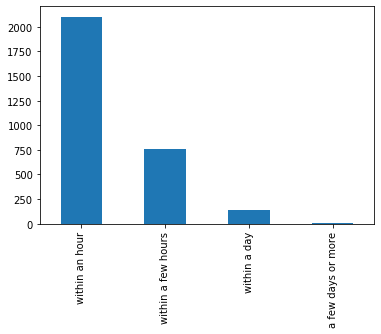

In [35]:
population['host_response_time'].value_counts().plot(kind="bar")

In [36]:
population['host_response_time'] = population['host_response_time'].apply(lambda x: str(x) if str(x) != "nan" else "within an hour")

In [37]:
population['host_response_rate'] = population['host_response_rate'].apply(lambda x: int(str(x)[:-1]) if str(x)[-1]=="%" else -1)

In [38]:
review_missing = []
for col in [cols for cols in population.columns if "review" in cols]:
    if sum(population[col].isna()) > 0:
        review_missing.append(col)
        print(sum(population[col].isna()))

290
290
290
290
290
290
290
290


In [39]:
review_missing

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [40]:
population[review_missing]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.60
1,93.0,9.0,9.0,10.0,10.0,9.0,9.0,1.04
7,98.0,10.0,10.0,10.0,10.0,10.0,10.0,5.66
8,94.0,10.0,10.0,10.0,10.0,10.0,10.0,4.10
9,96.0,10.0,10.0,10.0,10.0,10.0,9.0,2.82
16,98.0,10.0,10.0,10.0,10.0,10.0,10.0,3.51
17,95.0,9.0,9.0,9.0,9.0,9.0,9.0,0.20
20,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.56
21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.11
22,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.07


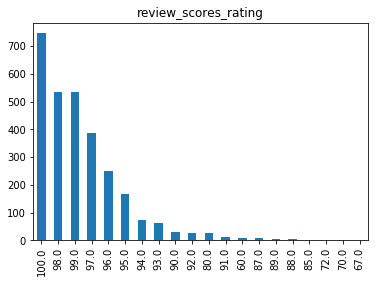

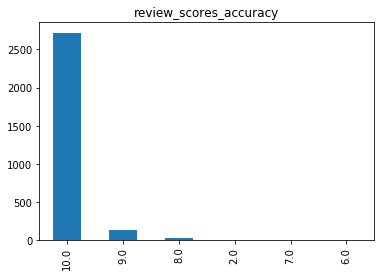

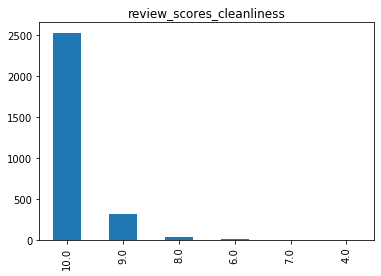

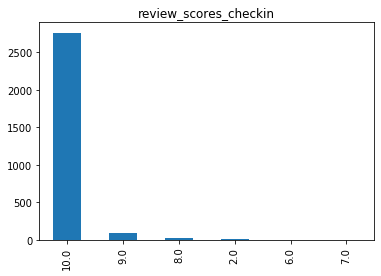

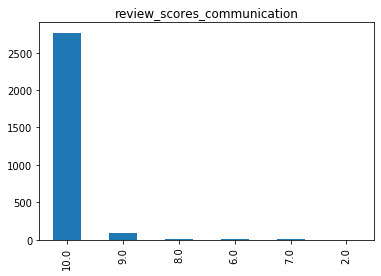

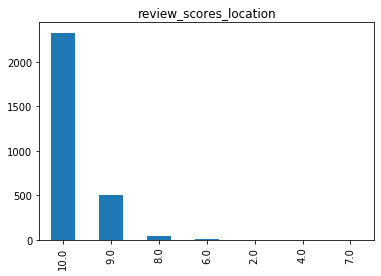

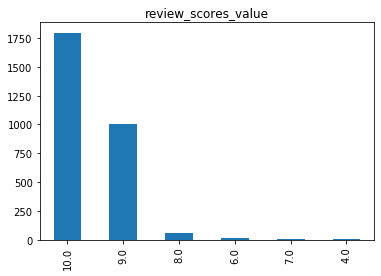

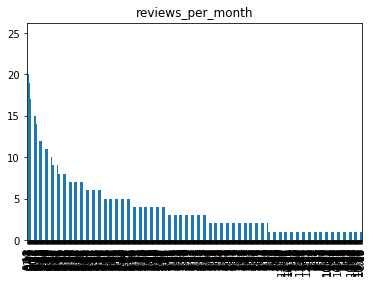

In [41]:
for col in review_missing:
    fig = plt.figure()
    plt.title(col)
    population[col].dropna().value_counts().plot(kind="bar")

(array([1146.,  616.,  427.,  294.,  206.,   95.,   55.,   23.,   11.,
           5.]),
 array([ 0.   ,  1.239,  2.478,  3.717,  4.956,  6.195,  7.434,  8.673,
         9.912, 11.151, 12.39 ]),
 <a list of 10 Patch objects>)

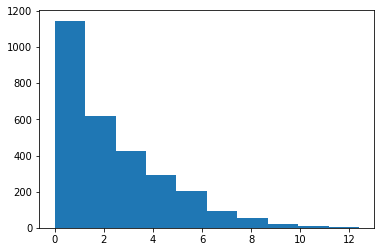

In [42]:
plt.hist(population['reviews_per_month'].dropna())

In [43]:
population.head(1)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,958,1169,within an hour,92,1,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,37.76931,-122.43386,1,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",170.0,100.0,100.0,2,25.0,1,30,1,1,30,30,1.0,30.0,3 months ago,2,3,4,92,194,47,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1,STR-0001256,0,moderate,0,0,1,1,0,0,1.6,0


In [44]:
population.select_dtypes(include = 'object')

,host_response_time,host_verifications,property_type,room_type,bed_type,amenities,calendar_updated,license,cancellation_policy
0,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",3 months ago,STR-0001256,moderate
1,within an hour,"['email', 'phone', 'reviews', 'jumio', 'govern...",House,Private room,Real Bed,"{Internet,Wifi,Kitchen,Breakfast,""Free street ...",today,STR-0000346,strict_14_with_grace_period
7,within an hour,"['email', 'phone', 'reviews', 'kba', 'work_ema...",Condominium,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Pets live on thi...",4 days ago,STR-0000028,strict_14_with_grace_period
8,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",House,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",today,STR-0000179,strict_14_with_grace_period
9,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free str...",3 weeks ago,STR-0001558,moderate
16,within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Apartment,Private room,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",4 weeks ago,STR-0000057,strict_14_with_grace_period
17,within a few hours,"['email', 'phone', 'reviews', 'jumio', 'govern...",Townhouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",7 months ago,NaN,strict_14_with_grace_period
20,within an hour,"['email', 'phone', 'reviews', 'kba']",Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",5 months ago,NaN,strict_14_with_grace_period
21,within a day,"['email', 'phone', 'facebook', 'reviews', 'jum...",Townhouse,Private room,Real Bed,"{Wifi,Kitchen,""Pets live on this property"",Dog...",today,STR-0000094,strict_14_with_grace_period
22,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba...",Loft,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Hot tub""...",4 days ago,City registration pending,moderate


In [45]:
to_float = ['host_listings_count','host_total_listings_count','maximum_nights',
           'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm']

for cols in to_float: 
    population[cols] = population[cols].astype(float)


In [46]:
population.select_dtypes(include = 'object')

,host_response_time,host_verifications,property_type,room_type,bed_type,amenities,calendar_updated,license,cancellation_policy
0,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",3 months ago,STR-0001256,moderate
1,within an hour,"['email', 'phone', 'reviews', 'jumio', 'govern...",House,Private room,Real Bed,"{Internet,Wifi,Kitchen,Breakfast,""Free street ...",today,STR-0000346,strict_14_with_grace_period
7,within an hour,"['email', 'phone', 'reviews', 'kba', 'work_ema...",Condominium,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Pets live on thi...",4 days ago,STR-0000028,strict_14_with_grace_period
8,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",House,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",today,STR-0000179,strict_14_with_grace_period
9,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free str...",3 weeks ago,STR-0001558,moderate
16,within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Apartment,Private room,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",4 weeks ago,STR-0000057,strict_14_with_grace_period
17,within a few hours,"['email', 'phone', 'reviews', 'jumio', 'govern...",Townhouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",7 months ago,NaN,strict_14_with_grace_period
20,within an hour,"['email', 'phone', 'reviews', 'kba']",Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",5 months ago,NaN,strict_14_with_grace_period
21,within a day,"['email', 'phone', 'facebook', 'reviews', 'jum...",Townhouse,Private room,Real Bed,"{Wifi,Kitchen,""Pets live on this property"",Dog...",today,STR-0000094,strict_14_with_grace_period
22,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba...",Loft,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Hot tub""...",4 days ago,City registration pending,moderate


In [47]:
population.select_dtypes(include = 'float')

,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1.0,1.0,37.76931,-122.43386,1.0,1.0,2.0,170.0,100.0,100.0,25.0,30.0,1.0,30.0,30.0,1.0,30.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.60
1,2.0,2.0,37.75402,-122.45805,1.0,1.0,1.0,99.0,0.0,10.0,20.0,5.0,1.0,5.0,5.0,1.0,5.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,1.04
7,2.0,2.0,37.75919,-122.42237,1.0,1.0,2.0,139.0,0.0,50.0,60.0,14.0,1.0,14.0,14.0,1.0,14.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,5.66
8,1.0,1.0,37.76259,-122.40543,1.0,1.0,1.0,135.0,1.0,50.0,0.0,365.0,1.0,365.0,365.0,1.0,365.0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,4.10
9,1.0,1.0,37.75874,-122.41327,1.0,2.0,3.0,265.0,500.0,100.0,45.0,60.0,30.0,60.0,60.0,30.0,60.0,96.0,10.0,10.0,10.0,10.0,10.0,9.0,2.82
16,1.0,1.0,37.76075,-122.43032,1.0,1.0,1.0,79.0,1.0,10.0,0.0,27.0,3.0,27.0,27.0,3.0,27.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,3.51
17,1.0,1.0,37.76203,-122.45455,1.0,2.0,3.0,166.0,899.0,279.0,25.0,367.0,30.0,367.0,367.0,30.0,367.0,95.0,9.0,9.0,9.0,9.0,9.0,9.0,0.20
20,1.0,1.0,37.74888,-122.42982,1.0,0.0,1.0,107.0,1.0,1.0,20.0,365.0,30.0,365.0,365.0,30.0,365.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.56
21,3.0,3.0,37.77252,-122.43216,1.0,1.0,1.0,110.0,130.0,30.0,0.0,29.0,3.0,29.0,29.0,3.0,29.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.11
22,1.0,1.0,37.79580,-122.41533,1.0,1.0,1.0,125.0,500.0,100.0,25.0,30.0,30.0,30.0,30.0,30.0,30.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.07


In [48]:
sum(population['host_listings_count'] !=
    population['host_total_listings_count']) 




0

In [49]:
population.drop('host_total_listings_count',axis=1,inplace=True)

In [50]:
population.head(1)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,958,1169,within an hour,92,1,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,37.76931,-122.43386,1,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",170.0,100.0,100.0,2,25.0,1,30.0,1,1.0,30.0,30.0,1.0,30.0,3 months ago,2,3,4,92,194,47,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1,STR-0001256,0,moderate,0,0,1,1,0,0,1.6,0


In [51]:
population.select_dtypes(include = 'float')

,host_listings_count,latitude,longitude,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1.0,37.76931,-122.43386,1.0,1.0,2.0,170.0,100.0,100.0,25.0,30.0,1.0,30.0,30.0,1.0,30.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.60
1,2.0,37.75402,-122.45805,1.0,1.0,1.0,99.0,0.0,10.0,20.0,5.0,1.0,5.0,5.0,1.0,5.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,1.04
7,2.0,37.75919,-122.42237,1.0,1.0,2.0,139.0,0.0,50.0,60.0,14.0,1.0,14.0,14.0,1.0,14.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,5.66
8,1.0,37.76259,-122.40543,1.0,1.0,1.0,135.0,1.0,50.0,0.0,365.0,1.0,365.0,365.0,1.0,365.0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,4.10
9,1.0,37.75874,-122.41327,1.0,2.0,3.0,265.0,500.0,100.0,45.0,60.0,30.0,60.0,60.0,30.0,60.0,96.0,10.0,10.0,10.0,10.0,10.0,9.0,2.82
16,1.0,37.76075,-122.43032,1.0,1.0,1.0,79.0,1.0,10.0,0.0,27.0,3.0,27.0,27.0,3.0,27.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,3.51
17,1.0,37.76203,-122.45455,1.0,2.0,3.0,166.0,899.0,279.0,25.0,367.0,30.0,367.0,367.0,30.0,367.0,95.0,9.0,9.0,9.0,9.0,9.0,9.0,0.20
20,1.0,37.74888,-122.42982,1.0,0.0,1.0,107.0,1.0,1.0,20.0,365.0,30.0,365.0,365.0,30.0,365.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.56
21,3.0,37.77252,-122.43216,1.0,1.0,1.0,110.0,130.0,30.0,0.0,29.0,3.0,29.0,29.0,3.0,29.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.11
22,1.0,37.79580,-122.41533,1.0,1.0,1.0,125.0,500.0,100.0,25.0,30.0,30.0,30.0,30.0,30.0,30.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.07


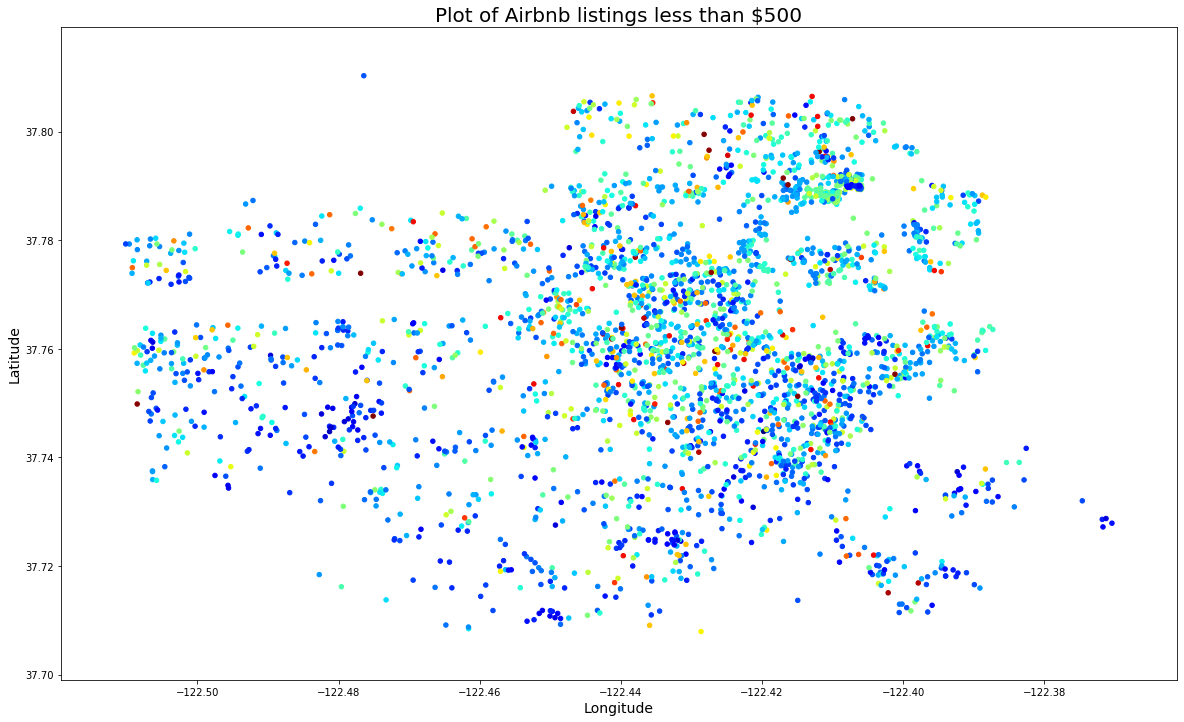

In [56]:

pop_500 = population[(population['price']<500)]
ax = pop_500.plot(kind="scatter",
           x='longitude',y='latitude',
           c='price', 
           cmap=plt.get_cmap('jet'),colorbar=False,
           figsize=(20,12)
           ).set_xlabel("Longitude", fontsize=14)
plt.title("Plot of Airbnb listings less than $500",fontsize=20)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.savefig("files/plots/SF_500.png")
plt.show()

In [53]:
population.loc[population[population['reviews_per_month'].isna()].index]['reviews_per_month'] = 0

In [54]:
import math
population['reviews_per_month'] = population['reviews_per_month'].apply(lambda x: 0 if math.isnan(x) else x)

In [55]:
#population.to_csv(csv_output)